In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("Train.csv")
print(dataset.shape)

(40000, 2)


In [3]:
display(dataset.head())

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [4]:
print(dataset["label"].value_counts())

pos    20011
neg    19989
Name: label, dtype: int64


In [5]:
le = LabelEncoder()

In [6]:
y = dataset["label"].values
print(y)
print(type(y))

['pos' 'pos' 'pos' ... 'neg' 'pos' 'pos']
<class 'numpy.ndarray'>


In [7]:
y = le.fit_transform(y)
print(y[:100])

[1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1
 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0]


In [8]:
print(dataset["review"][0])
print(dataset["review"][1])

mature intelligent and highly charged melodrama unbelivebly filmed in China in 1948. wei wei's stunning performance as the catylast in a love triangle is simply stunning if you have the oppurunity to see this magnificent film take it
http://video.google.com/videoplay?docid=211772166650071408&hl=en Distribution was tried.<br /><br />We opted for mass appeal.<br /><br />We want the best possible viewing range so, we forgo profit and continue our manual labor jobs gladly to entertain you for working yours.<br /><br />View Texas tale, please write about it... If you like it or not, if you like Alex or not, if you like Stuie, Texas or Texas tale... Just write about it.<br /><br />Your opinion rules.


## Preprocessing of Text Data

In [9]:
sw = set(stopwords.words("english"))
ps = PorterStemmer()

In [10]:
def clean_text(sample):
    sample = sample.lower()
    sample = sample.replace("<br /><br />", "")
    sample = re.sub("[^a-zA-Z]+", " ", sample)
    sample = sample.split(" ")
    # Removing Stopwords and Performing Stemming, Using List Comprehension
    sample = [ps.stem(s) for s in sample if s not in sw]    
    sample = " ".join(sample)
    return sample

In [11]:
example = clean_text(dataset["review"][11])
print(example)

robert jordan televis star robert jordan like thing orderli time properli execut world children seen heard would mr jordan want becom master rambuncti band boy scout rate staff figur learn interact youth inclin watch show cours watch jordan cope compris fun like mr belveder mr belveder goe colleg one sure pleas anyon interest obtain copi film pleas write iamas yahoo com


In [12]:
dataset["cleaned_review"] = dataset["review"].apply(clean_text) # Cleaning The Entire Text in The Dataset

In [13]:
display(dataset.head())

,review,label,cleaned_review
0,mature intelligent and highly charged melodram...,pos,matur intellig highli charg melodrama unbelive...
1,http://video.google.com/videoplay?docid=211772...,pos,http video googl com videoplay docid hl en dis...
2,Title: Opera (1987) Director: Dario Argento Ca...,pos,titl opera director dario argento cast cristin...
3,I think a lot of people just wrote this off as...,pos,think lot peopl wrote anoth one tom cruis weir...
4,This is a story of two dogs and a cat looking ...,pos,stori two dog cat look way back home old wise ...


In [14]:
corpus = dataset["cleaned_review"].values

In [15]:
cv = CountVectorizer(max_df=0.5, max_features=50000)
X = cv.fit_transform(corpus)
print(X.shape)

(40000, 50000)


In [16]:
print(X[0])

  (0, 26138)	1
  (0, 21816)	1
  (0, 20351)	1
  (0, 9499)	1
  (0, 26560)	1
  (0, 44629)	1
  (0, 9931)	1
  (0, 47634)	2
  (0, 39856)	2
  (0, 30823)	1
  (0, 9026)	1
  (0, 25039)	1
  (0, 43630)	1
  (0, 36910)	1
  (0, 35372)	1
  (0, 25474)	1
  (0, 41058)	1


In [17]:
tfidf = TfidfTransformer()
X = tfidf.fit_transform(X)
print(X.shape)

(40000, 50000)


In [18]:
print(X[0])

  (0, 47634)	0.5920011236382112
  (0, 44629)	0.35085644983076947
  (0, 43630)	0.21831285409006126
  (0, 41058)	0.08381958738922976
  (0, 39856)	0.3257356386942206
  (0, 36910)	0.12019616469026352
  (0, 35372)	0.06360992061360375
  (0, 30823)	0.09150742090549654
  (0, 26560)	0.19005467617975821
  (0, 26138)	0.18411548708696168
  (0, 25474)	0.17429834208396788
  (0, 25039)	0.07856379122772277
  (0, 21816)	0.14367484199159275
  (0, 20351)	0.13393901318695992
  (0, 9931)	0.1991671731452596
  (0, 9499)	0.17565914931902576
  (0, 9026)	0.35085644983076947


In [19]:
print(X.shape)
print(y.shape)

(40000, 50000)
(40000,)


## Neural Network

In [20]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (X.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                800016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [23]:
X_val = X[:5000]
X_train = X[5000:]

y_val = y[:5000]
y_train = y[5000:]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(35000, 50000) (35000,)
(5000, 50000) (5000,)


In [24]:
hist = model.fit(X_train, y_train, batch_size=128, epochs=2, validation_data=(X_val, y_val))

Train on 35000 samples, validate on 5000 samples
Epoch 1/2
35000/35000 [==============================] - 16s 470us/step - loss: 0.4666 - accuracy: 0.8612 - val_loss: 0.2834 - val_accuracy: 0.8906
Epoch 2/2
35000/35000 [==============================] - 17s 483us/step - loss: 0.2202 - accuracy: 0.9155 - val_loss: 0.2470 - val_accuracy: 0.8980


In [25]:
result = hist.history

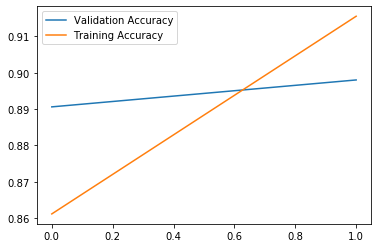

In [26]:
plt.plot(result['val_accuracy'], label="Validation Accuracy")
plt.plot(result['accuracy'], label="Training Accuracy")
plt.legend()
plt.show()

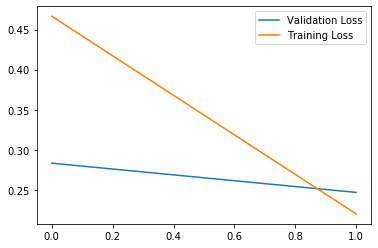

In [27]:
plt.plot(result['val_loss'], label="Validation Loss")
plt.plot(result['loss'], label="Training Loss")
plt.legend()
plt.show()

In [28]:
model.evaluate(X_val, y_val)

5000/5000 [==============================] - 2s 347us/step


[0.24701047587394714, 0.8980000019073486]

### Testing

In [29]:
test = pd.read_csv("Test.csv")
print(test.shape)

(10000, 1)


In [30]:
display(test.head())

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...
3,"""Queen of the Damned"" is one of the best vampi..."
4,The Caprica episode (S01E01) is well done as a...


In [31]:
test["cleaned_review"] = test["review"].apply(clean_text)

In [32]:
X_test = test["cleaned_review"]
X_test = cv.transform(X_test)

In [33]:
print(X_test.shape)

(10000, 50000)


In [34]:
X_test = tfidf.transform(X_test)

In [35]:
print(X_test[0])

  (0, 48776)	0.07208926347281219
  (0, 48715)	0.046986858401893365
  (0, 47692)	0.03987665529115899
  (0, 47553)	0.19954844069132213
  (0, 47509)	0.04302913206539107
  (0, 47422)	0.03627916401063809
  (0, 47287)	0.047035868047046965
  (0, 46778)	0.16526909672517773
  (0, 45843)	0.05171250702699037
  (0, 44092)	0.055801071867578274
  (0, 42403)	0.08343446563103527
  (0, 42333)	0.11098533602192488
  (0, 41820)	0.13697170358518918
  (0, 39016)	0.11084338308716735
  (0, 38191)	0.08941501647978921
  (0, 35173)	0.0876569330402251
  (0, 34817)	0.10611565736684776
  (0, 34035)	0.055960911190802515
  (0, 33364)	0.06697813391387489
  (0, 33016)	0.058735018848713516
  (0, 32898)	0.13101144179390445
  (0, 31835)	0.15502519941319556
  (0, 31337)	0.08993561438857067
  (0, 30823)	0.051580196163986895
  (0, 30551)	0.14585341638378774
  :	:
  (0, 15071)	0.1349475890731778
  (0, 14812)	0.10582820264848805
  (0, 14217)	0.058957468967350594
  (0, 12799)	0.08023292032720176
  (0, 12634)	0.1760330645000115


In [36]:
y_pred = model.predict(X_test)

In [37]:
print(y_pred)

[[0.04387864]
 [0.05127081]
 [0.00489959]
 ...
 [0.99204713]
 [0.9952208 ]
 [0.02372268]]


In [38]:
print(y_pred >= 0.5)

[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [False]]


In [39]:
y_pred[y_pred >= 0.5] = 1
y_pred = y_pred.astype('int')
print(y_pred[:25])

[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]


In [40]:
dic = {0 : 'neg', 1 : 'pos'}
y_pred = [dic[p[0]] for p in y_pred]
print(y_pred[:10])

['neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos']


In [41]:
ids = np.arange(10000)
final_matrix = np.stack((ids, y_pred), axis=1)
print(final_matrix)

[['0' 'neg']
 ['1' 'neg']
 ['2' 'neg']
 ...
 ['9997' 'pos']
 ['9998' 'pos']
 ['9999' 'neg']]


In [42]:
df = pd.DataFrame(final_matrix, columns=["Id", "label"])
display(df.head())

,Id,label
0,0,neg
1,1,neg
2,2,neg
3,3,pos
4,4,pos


In [43]:
df.to_csv("Predictions.csv", index = False)